# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

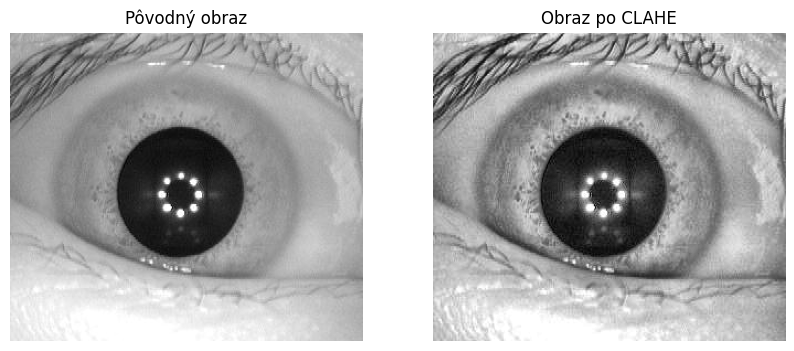

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Načítanie obrazu
image = cv2.imread('S1004R03.jpg', cv2.IMREAD_GRAYSCALE)

# Vytvorenie objektu CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Aplikovanie CLAHE
clahe_image = clahe.apply(image)

# Zobrazenie výsledkov
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Pôvodný obraz')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Obraz po CLAHE')
plt.axis('off')

plt.show()


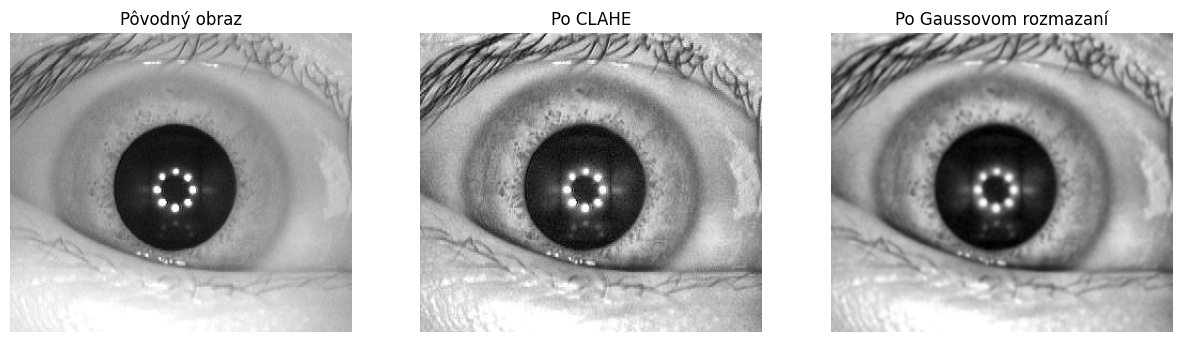

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Načítanie obrázka v odtieňoch sivej
image = cv2.imread('S1004R03.jpg', cv2.IMREAD_GRAYSCALE)  

# Aplikovanie CLAHE (zlepšenie kontrastu)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(image)

# Aplikovanie Gaussovho rozmazania
blurred_image = cv2.GaussianBlur(clahe_image, (5,5), 0)  # Kernel (5x5), sigma=0 (automaticky dopočíta)

# Zobrazenie výsledkov
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Pôvodný obraz')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Po CLAHE')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Po Gaussovom rozmazaní')
plt.axis('off')

plt.show()


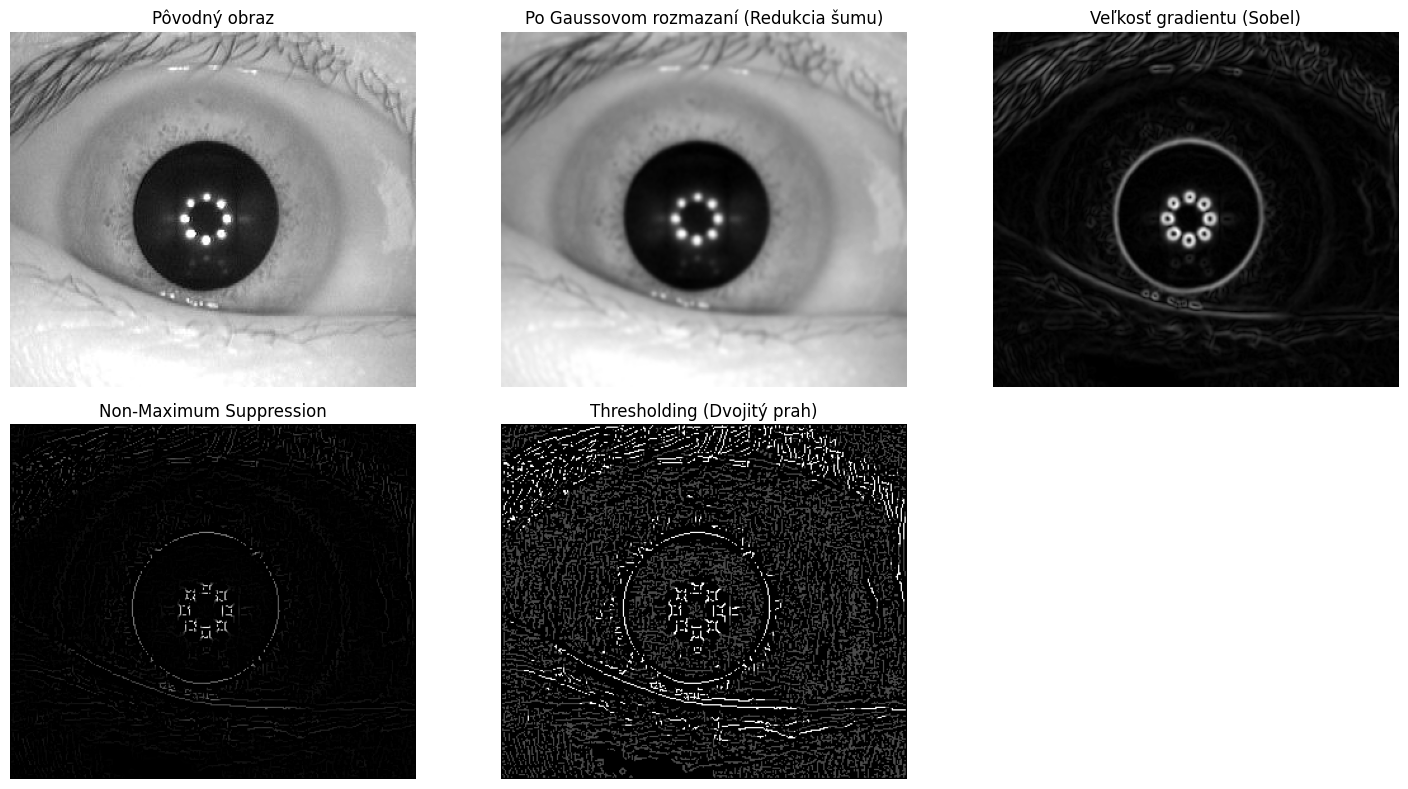

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Načítanie obrázka v odtieňoch sivej
image = cv2.imread('S1004R03.jpg', cv2.IMREAD_GRAYSCALE)  # Nahraď 'obraz.jpg' svojím súborom

#Redukcia šumu - Gaussovo rozmazanie
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

#Výpočet gradientov pomocou Sobelovho operátora
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Zmena intenzity v smere X
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Zmena intenzity v smere Y

# Výpočet veľkosti a uhla gradientu
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))  # Normalizácia
gradient_direction = np.arctan2(sobel_y, sobel_x)  # Uhol gradientu v radiánoch

#Non-Maximum Suppression (Potlačenie nepotrebných hrán)
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    output = np.zeros((rows, cols), dtype=np.uint8)
    
    # Zaokrúhlenie smerov gradientu na 4 možné smery (0°, 45°, 90°, 135°)
    angle = np.rad2deg(direction) % 180

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            try:
                q, r = 255, 255  # Hodnoty pixelov na porovnanie

                # 0° (vodorovne)
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q, r = magnitude[i, j+1], magnitude[i, j-1]
                # 45° (diagonálne ↘)
                elif 22.5 <= angle[i, j] < 67.5:
                    q, r = magnitude[i+1, j-1], magnitude[i-1, j+1]
                # 90° (zvislo)
                elif 67.5 <= angle[i, j] < 112.5:
                    q, r = magnitude[i+1, j], magnitude[i-1, j]
                # 135° (diagonálne ↙)
                elif 112.5 <= angle[i, j] < 157.5:
                    q, r = magnitude[i-1, j-1], magnitude[i+1, j+1]

                # Potlačenie ne-maximálnych hodnôt
                if magnitude[i, j] >= q and magnitude[i, j] >= r:
                    output[i, j] = magnitude[i, j]
                else:
                    output[i, j] = 0

            except IndexError:
                pass
    return output

nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

#Thresholding (Dvojitý prah)
def threshold(img, low_ratio=0.05, high_ratio=0.1):
    high_threshold = img.max() * high_ratio
    low_threshold = high_threshold * low_ratio
    
    strong_edges = (img >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((img < high_threshold) & (img >= low_threshold)).astype(np.uint8) * 75
    
    return strong_edges + weak_edges

thresholded_image = threshold(nms_image)

#Vizualizácia jednotlivých krokov
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(image, cmap='gray')
plt.title("Pôvodný obraz")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(blurred, cmap='gray')
plt.title("Po Gaussovom rozmazaní (Redukcia šumu)")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Veľkosť gradientu (Sobel)")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(nms_image, cmap='gray')
plt.title("Non-Maximum Suppression")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholding (Dvojitý prah)")
plt.axis('off')

plt.tight_layout()
plt.show()
